In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [85]:
df = pd.read_csv('weight-height.csv')
df.head()

,Cinsiyet,Kilo,Boy
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cinsiyet  10000 non-null  int64  
 1   Kilo      10000 non-null  float64
 2   Boy       10000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [89]:
y = df["Kilo"]
x = df["Boy"]
# veri setimizde yalnızca boy üzerinden kilo tahminlemesi yapacağımız için x ve y değerlerimizi bu şekilde belirledim

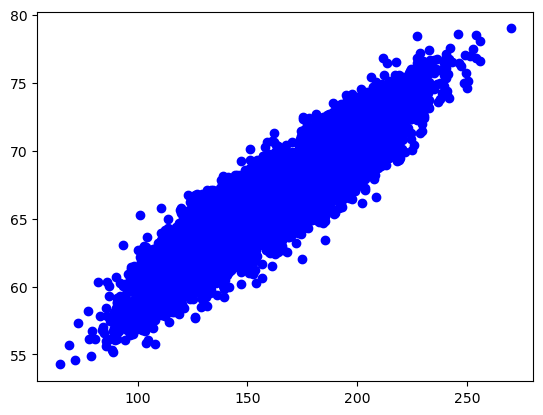

In [91]:
plt.scatter(x,y,c = "blue")
plt.show()
# x ve y değerlerimizin nasıl dağıldığına dair bir scatter grafiği oluşturdum

In [109]:
def standardise(x):
    return(x-x.mean())/x.std()
x = standardise(x)
# tüm x değerlerini standardise etmeyi uygun gördüm

In [111]:
x

0       2.505672
1       0.027099
2       1.597726
3       1.825131
4       1.398680
          ...   
9995   -0.768113
9996    0.293616
9997   -1.026678
9998    0.075124
9999   -1.488433
Name: Boy, Length: 10000, dtype: float64

In [113]:
# teorik olarak ilerlemeye devam etmek için beta değişkenlerime rastgele başlangıc değerleri atayacağım
beta0 = np.random.rand()
beta1 = np.random.rand()
alpha = 0.00001 # learning rate'imi de bu değerde belirlemeyi uygun gördüm

In [115]:
def tahmin(x,beta0,beta1):
    return beta0 + beta1*x
    #basit anlamda lineer regresyonun formülünü buraya işledim

In [117]:
def sse(y,ypred):
    return np.sum((y-ypred)**2) # sse değerlerini hesapladım.

In [119]:
#gradyanları hesapladım

def gradyan(y,ypred,x):
    grad_beta0 = np.sum((ypred-y)*1)
    grad_beta1 = np.sum((ypred-y)*x)
    return grad_beta0,grad_beta1

In [121]:
# gradyanlarını bulduğum parametreleri güncelledim

def parametreleri_guncelle(beta0,beta1,grad_beta0,grad_beta1,alpha):
    beta0_new = beta0 - alpha * grad_beta0
    beta1_new = beta1 - alpha * grad_beta1
    return beta0_new, beta1_new

In [123]:
# düşük bir değere yakınsayana kadar bu işlemleri tekrarlatmam gerekiyor. Bunun için bir döngü yazdım

num_iter = 1000
SSE_list = []
ypred_list = []
for i in range(num_iter):
    ypred= tahmin(x,beta0,beta1)
    J = sse(y,ypred)
    SSE_list.append(J)
    grad_beta0,grad_beta1 = gradyan(y,ypred,x)
    beta0,beta1 = parametreleri_guncelle(beta0,beta1,grad_beta0,grad_beta1,alpha)
    ypred_list.append(ypred)
SSE_list

[43255647.439290166,
 35041148.795692325,
 28387404.64350817,
 22997871.677029867,
 18632349.809579387,
 15096276.963613056,
 12232057.850379461,
 9912040.281177603,
 8032825.979261585,
 6510662.33730969,
 5277709.740833698,
 4279018.10002638,
 3470077.8404657543,
 2814836.205510669,
 2284090.461180713,
 1854186.3920598566,
 1505964.0829386604,
 1223904.0019122805,
 995435.3276637697,
 810375.6945424359,
 660477.3860601967,
 539059.7516097748,
 440711.46399520576,
 361049.3480224593,
 296523.03165047476,
 244256.71341753515,
 201920.99405179577,
 167629.06007190145,
 139852.59250031074,
 117353.65291852385,
 99129.51116973447,
 84367.95579629343,
 72411.09549268999,
 62726.03828135834,
 54881.141644189236,
 48526.77512832457,
 43379.738056266084,
 39210.63787058667,
 35833.666592760914,
 33098.31975450489,
 30882.688731909795,
 29088.027535884237,
 27634.351912245897,
 26456.874612663454,
 25503.11796400806,
 24730.575049441817,
 24104.815265026773,
 23597.949820520906,
 23187.38879497

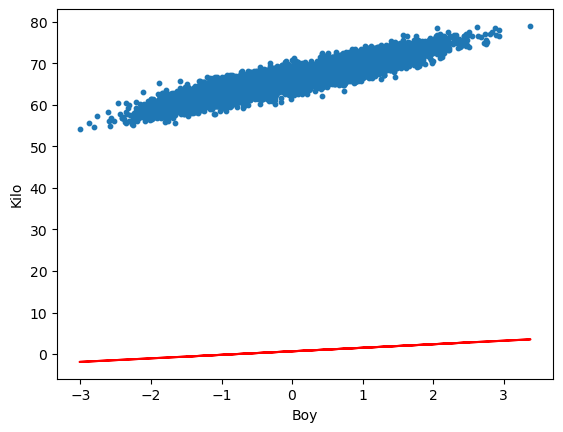

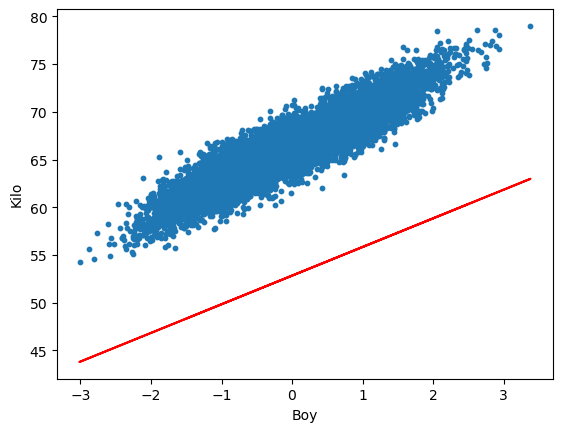

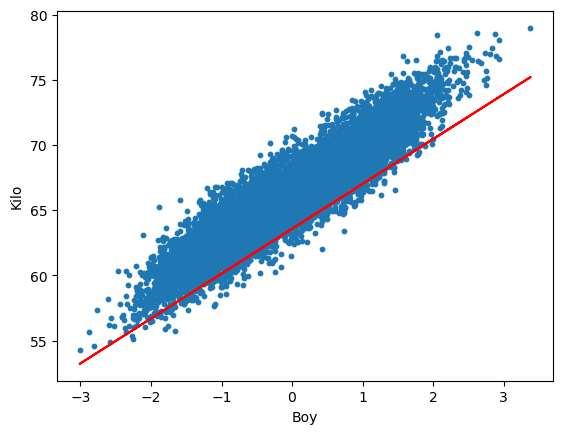

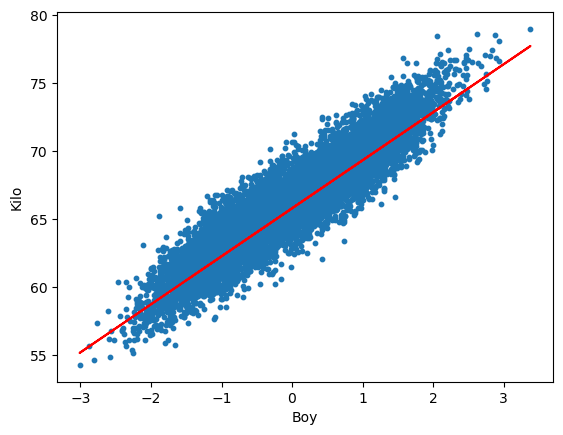

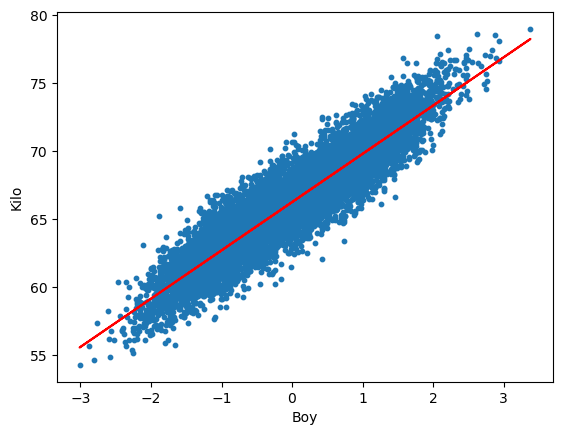

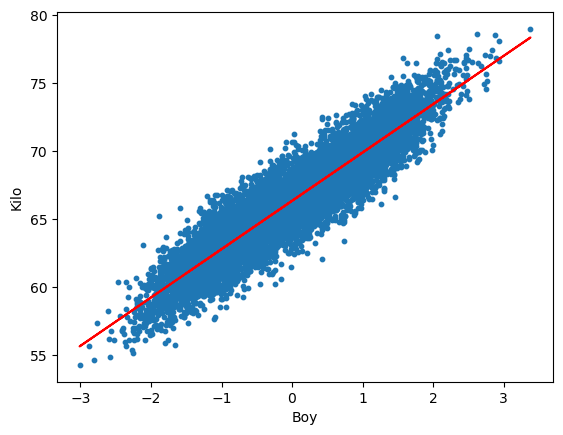

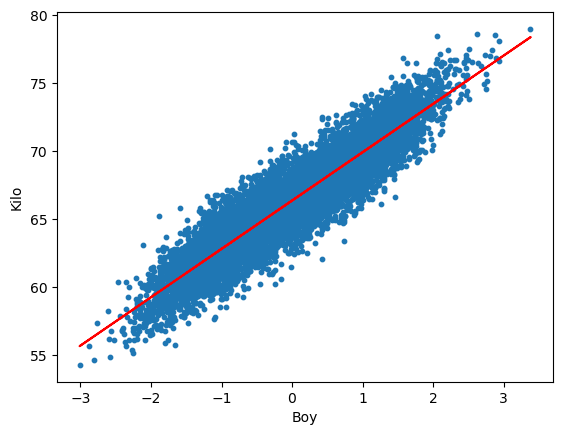

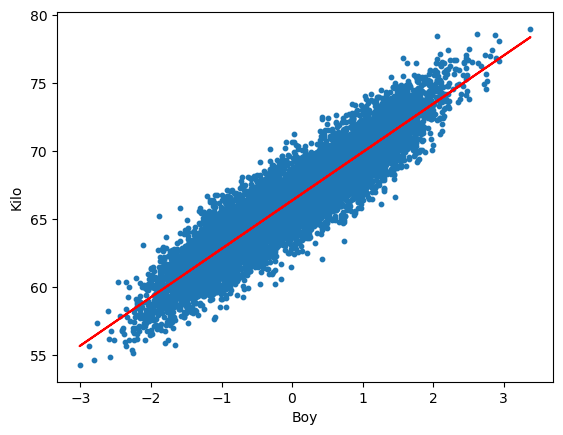

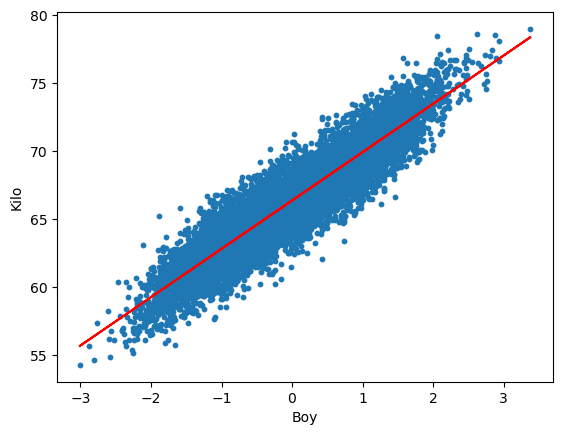

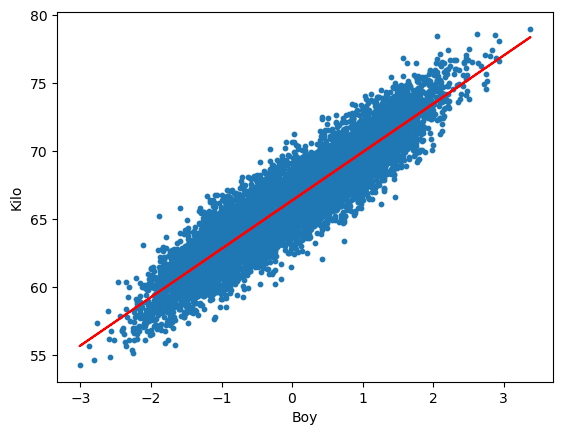

In [127]:
# modelimin yakınsama sürecini bir görselleştirmeyle daha iyi anlamaya çalıştım. Belli aralıklarla grafiklerimi oluşturdum ve hata oranının nasıl
# düştüğünü, modelimin nasıl doğru cevaplar vermeye başladığını gördüm

for i in range(10):
    plt.scatter(x,y, s = 10)
    plt.plot(x,ypred_list[15*i], color = "r")
    plt.xlabel("Boy")
    plt.ylabel("Kilo")
    plt.show()

In [129]:
# r square ile başarı ölçümümü sağlamak adına bir fonksiyon oluşturuyorum.

def r2(SSE,SST):
    return 1-(SSE/SST)

In [133]:
# SST yi bulmak için standart sapmaların karelerini buluyor ve eleman sayısıyla çarpıyorum

SST = (y.std())**2*10000 
r2(21437,SST)

0.8551893834584264

## buraya kadar verilerimi direkt olarak kullandım herhangi bir bölümleme yapmadım, verimi train ve test olarak bölersem daha doğru sonuçlara ulaşacağım

In [138]:
def splitting(veriseti, oran):
    egitim_seti_boyutu = int(len(veriseti)*oran)
    egitim_index = np.random.choice(range(0,len(veriseti)),replace = False,size=egitim_seti_boyutu)
    egitim_seti = veriseti.iloc[egitim_index]
    test_seti = veriseti[~veriseti.index.isin(egitim_index)]
    return egitim_seti, test_seti
    

In [144]:
egitim_seti, test_seti = splitting(df,0.8)
egitim_seti, test_seti

(      Cinsiyet       Kilo         Boy
 9511         0  59.822735  122.152383
 6647         0  66.643323  162.160095
 9282         0  65.636490  157.919316
 1531         1  68.968680  177.809028
 1169         1  65.642584  162.685521
 ...        ...        ...         ...
 9510         0  61.146344  105.382922
 9624         0  64.830608  156.911817
 7019         0  62.035319  119.418135
 9104         0  59.477818  122.163350
 5950         0  62.504497  142.639642
 
 [8000 rows x 3 columns],
       Cinsiyet       Kilo         Boy
 16           1  72.418317  196.028506
 18           1  69.640060  185.983958
 31           1  74.033808  212.910225
 33           1  69.180161  205.183621
 35           1  70.400929  192.903515
 ...        ...        ...         ...
 9978         0  57.375759  114.192209
 9987         0  65.610243  151.169475
 9993         0  60.030434   97.687432
 9995         0  66.172652  136.777454
 9999         0  61.944246  113.649103
 
 [2000 rows x 3 columns])

In [146]:
beta0 = np.random.rand()
beta1 = np.random.rand()
alpha = 0.00001

In [148]:
x_egitim = egitim_seti["Boy"]
x_test = test_seti["Boy"]

y_egitim = egitim_seti["Kilo"]
y_test = test_seti["Kilo"]




In [152]:
# şimdi de eğitim setim üzerinden bir yakınsama sağlamayı amaçladım
x = standardise(x_egitim)

num_iter = 1000
SSE_list = []
ypred_list = []
for i in range(num_iter):
    ypred= tahmin(x,beta0,beta1)
    J = sse(y,ypred)
    SSE_list.append(J)
    grad_beta0,grad_beta1 = gradyan(y,ypred,x)
    beta0,beta1 = parametreleri_guncelle(beta0,beta1,grad_beta0,grad_beta1,alpha)
    ypred_list.append(ypred)
SSE_list

[16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,
 16971.16397642468,


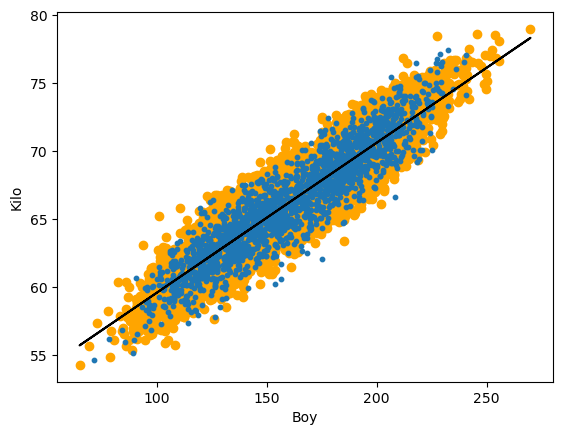

In [156]:
# bu şekilde yapmış olduğum işin doğruluğunu kaıtlamak adına bir görselleştirme sağladım

plt.scatter(x_egitim,y_egitim, color = "orange")
plt.scatter(x_test,y_test, s=10)
plt.plot(x_egitim, ypred, color="black")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.show()

In [162]:
# sonuç olarak bulmuş olduğum değerler ile normalde olan değerleri kıyasladım

x_test = standardise(x_test)
tahminler = [] 
for i in x_test:
    tahminler.append(tahmin(i,beta0,beta1))
tahminler = pd.DataFrame(tahminler,columns =['yşapka'])
tahminler = tahminler.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
sonuçlar = pd.concat([tahminler, y_test], axis=1)
sonuçlar

,yşapka,Kilo
0,70.177755,72.418317
1,69.073366,69.640060
2,72.033884,74.033808
3,71.184351,69.180161
4,69.834165,70.400929
...,...,...
1995,61.179930,57.375759
1996,65.245546,65.610243
1997,59.365245,60.030434
1998,63.663156,66.172652
